In [109]:
#Libraries import..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
#Import and read data..
df_score = pd.read_csv("http://bit.ly/w-data")

In [111]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [112]:
#Checking first five values of data...
df_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [113]:
df_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

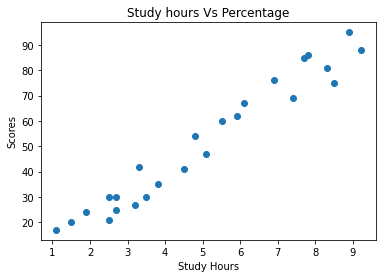

In [114]:
#Visualizing Hours vs Scores...
plt.scatter( df_score['Hours'], df_score['Scores'])
plt.title('Study hours Vs Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Scores')

In [115]:
x=df_score.iloc[:,:-1].values
y=df_score.iloc[:,1].values

In [116]:
#Train and Test the data..

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [117]:
# Fit the data..

from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

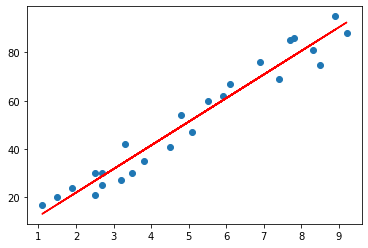

In [118]:
#plotting of interception line..

line =lin_reg.coef_*x+lin_reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

In [119]:
#predicting test results...

y_pred = lin_reg.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


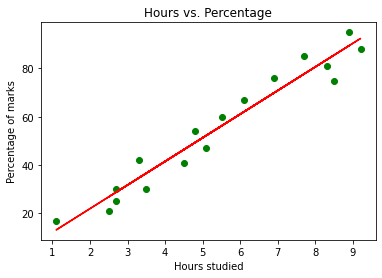

In [120]:
#Visualising the Training set results
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, lin_reg.predict(x_train), color = 'red')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()


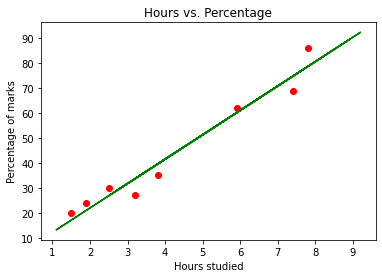

In [121]:
#Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [122]:
#comparing test vs predicted data..
print(y_test)
print(y_pred)

[20 27 69 30 62 35 24 86]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [123]:
#predicting the score if study hours becomes 9.25hr..
data = np.array(9.25)
data = data.reshape(-1, 1)
pred_score = lin_reg.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred_score))

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [124]:
#predicting the score if study hours becomes 9.50hr..
data = np.array(9.50)
data = data.reshape(-1, 1)
pred_score = lin_reg.predict(data)
print("If the student studies for 9.50 hours/day, the score is {}.".format(pred_score))

If the student studies for 9.50 hours/day, the score is [95.36219891].


In [125]:
#Error Metrics..

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.4197278080276545
MSE: 22.96509721270044
RMSE: 4.792191274636316


# Conclusion:
If Student studies for 9.25 hours/day then Predicted Score will be 92.91.
If we increses the study hours then predicted score will be improved accordingly..